LOAN PREDICTION - BINARY CLASSIFICATION

Dataset Information

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

This is a standard supervised classification task.A classification problem where we have to predict whether a loan would be approved or not. Below is the dataset attributes with description.

Variable Description

Loan_ID Unique Loan ID Gender Male/ Female Married Applicant married (Y/N) Dependents Number of dependents Education Applicant Education (Graduate/ Under Graduate) Self_Employed Self employed (Y/N) ApplicantIncome Applicant income CoapplicantIncome Coapplicant income LoanAmount Loan amount in thousands Loan_Amount_Term Term of loan in months Credit_History credit history meets guidelines Property_Area Urban/ Semi Urban/ Rural Loan_Status Loan approved (Y/N)

In [1]:
#Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from pandas_profiling import ProfileReport
import seaborn as sns
import pickle

In [2]:
data=pd.read_csv("loan_data_set.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


DATA PREPROCESSING

cleaning and filling in the missing values.

In [5]:
#checking for missing values in the dataset
data.apply(lambda x:sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#The percentage of missing values in the columns
missing = data.isnull().sum()/len(data)
missing = missing[missing > 0]
missing.sort_values(inplace=True)

missing

Married             0.004886
Gender              0.021173
Loan_Amount_Term    0.022801
Dependents          0.024430
LoanAmount          0.035831
Self_Employed       0.052117
Credit_History      0.081433
dtype: float64

In [7]:
#FILLING IN THE MISSING VALUES IN THE NUMERIC DATA WITH THE MEAN
data["LoanAmount"]=data["LoanAmount"].fillna(data["LoanAmount"].mean())
data["Loan_Amount_Term"]=data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mean())
data["CoapplicantIncome"]=data["CoapplicantIncome"].fillna(data["CoapplicantIncome"].mean())
data["Credit_History"]=data["Credit_History"].fillna(data["Credit_History"].mean())

In [8]:
#FILLING IN THE MISSING VALUES IN THE CATEGORICAL DATA WITH THE MODE
data["Married"]=data["Married"].fillna(data["Married"].mode()[0])
data["Gender"]=data["Gender"].fillna(data["Gender"].mode()[0])
data["Dependents"]=data["Dependents"].fillna(data["Dependents"].mode()[0])
data["Self_Employed"]=data["Self_Employed"].fillna(data["Self_Employed"].mode()[0])

In [9]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**EXPLORATORY DATA ANALYSIS**

Some of the numeric data is skewed
Normalize the data

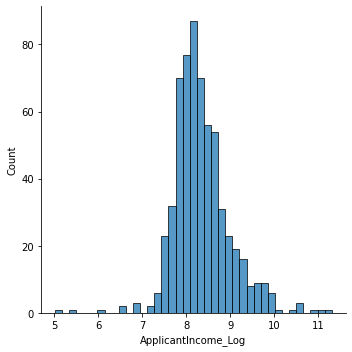

In [10]:
data["ApplicantIncome_Log"] = np.log(data["ApplicantIncome"])
sns.displot(data["ApplicantIncome_Log"])

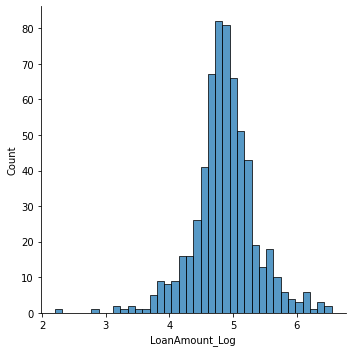

In [11]:
data["LoanAmount_Log"]=np.log(data["LoanAmount"])
sns.displot(data["LoanAmount_Log"])

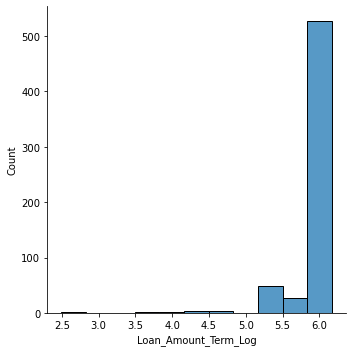

In [12]:
data["Loan_Amount_Term_Log"]=np.log(data["Loan_Amount_Term"])
sns.displot(data["Loan_Amount_Term_Log"])

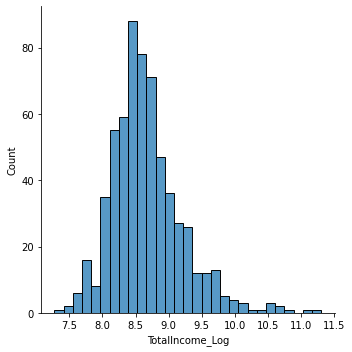

In [14]:
#Creating a new feature, total_income, a summation of applicant income and coapplicant income
data["TotalIncome"]= data["ApplicantIncome"] + data["CoapplicantIncome"]
data["TotalIncome_Log"] = np.log(data["TotalIncome"])
sns.displot(data["TotalIncome_Log"])

In [17]:
#To replace zeros on CoapplicantIncome to allow log transformation
data["CoapplicantIncome"]= data["CoapplicantIncome"].replace([0], 1)

(data["CoapplicantIncome"]==0).sum()

0

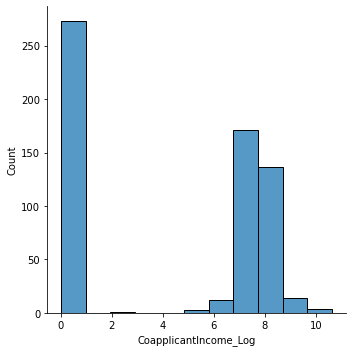

In [18]:
data["CoapplicantIncome_Log"] = np.log(data["CoapplicantIncome"])
sns.displot(data["CoapplicantIncome_Log"])

In [19]:
data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_Log,LoanAmount_Log,Loan_Amount_Term_Log,TotalIncome,TotalIncome_Log,CoapplicantIncome_Log
ApplicantIncome,1.000000,-0.116571,0.565620,-0.045242,-0.014477,0.790532,0.434849,-0.024085,0.893037,0.717829,-0.250416
CoapplicantIncome,-0.116571,1.000000,0.187842,-0.059684,-0.001666,-0.237856,0.204179,-0.042948,0.342813,0.383843,0.573564
LoanAmount,0.565620,0.187842,1.000000,0.038801,-0.007738,0.551556,0.895324,0.044905,0.620102,0.687552,0.047553
Loan_Amount_Term,-0.045242,-0.059684,0.038801,1.000000,0.001395,-0.030739,0.086531,0.938871,-0.069830,-0.055320,0.013604
Credit_History,-0.014477,-0.001666,-0.007738,0.001395,1.000000,0.019169,-0.025248,-0.007860,-0.014447,0.019156,0.002367
ApplicantIncome_Log,0.790532,-0.237856,0.551556,-0.030739,0.019169,1.000000,0.491066,-0.014618,0.639953,0.740300,-0.368224
LoanAmount_Log,0.434849,0.204179,0.895324,0.086531,-0.025248,0.491066,1.000000,0.084534,0.503817,0.657507,0.131021
Loan_Amount_Term_Log,-0.024085,-0.042948,0.044905,0.938871,-0.007860,-0.014618,0.084534,1.000000,-0.042237,-0.029522,0.012673
TotalIncome,0.893037,0.342813,0.620102,-0.069830,-0.014447,0.639953,0.503817,-0.042237,1.000000,0.852873,0.023061
TotalIncome_Log,0.717829,0.383843,0.687552,-0.055320,0.019156,0.740300,0.657507,-0.029522,0.852873,1.000000,0.149139


**ENCODING**

In [20]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
le = LabelEncoder()
for col in cols:
    data[col] = le.fit_transform(data[col])

In [31]:
import pickle
filehandler = open("le.pkl", "wb")
pickle.dump(le, filehandler)
filehandler.close()

In [32]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_Log,LoanAmount_Log,Loan_Amount_Term_Log,TotalIncome,TotalIncome_Log,CoapplicantIncome_Log
0,LP001002,1,0,0,0,0,5849,1.0,146.412162,360.0,1.0,2,1,8.674026,4.986426,5.886104,5849.0,8.674026,0.000000
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,8.430109,4.852030,5.886104,6091.0,8.714568,7.318540
2,LP001005,1,1,0,0,1,3000,1.0,66.000000,360.0,1.0,2,1,8.006368,4.189655,5.886104,3000.0,8.006368,0.000000
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,7.856707,4.787492,5.886104,4941.0,8.505323,7.765569
4,LP001008,1,0,0,0,0,6000,1.0,141.000000,360.0,1.0,2,1,8.699515,4.948760,5.886104,6000.0,8.699515,0.000000


**SPLITTING THE DATA INTO TRAIN AND TEST**

In [33]:
#SPECIFY INPUT AND OUTPUT ATTRIBUTES AND DROP THE TARGET
X= data.drop(columns=['Loan_Status'], axis=1)
X= data.drop(columns=['Loan_ID'], axis=1)
y= data['Loan_Status']

In [34]:
X = data.iloc[:, 1:12].values
y = data.iloc[:, 12].values

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=42)

FEATURE SCALING 

For features spanning varying degrees in our data.

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [37]:
#Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)
explained_variance = pca.explained_variance_ratio_

In [38]:
#Classifying the function
from sklearn.model_selection import cross_val_score
def classify(classifier, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    classifier.fit(x_train, y_train)
    print('Accuracy is', classifier.score(x_test, y_test)*100)
    
    score = cross_val_score(classifier, x, y, cv=5)
    print('Cross validation is', np.mean(score)*100)
    

In [39]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classify(classifier, X, y)

C:\Users\Mukiri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Mukiri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Accuracy is 77.92207792207793


C:\Users\Mukiri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Mukiri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Cross validation is 80.29454884712781


In [40]:
import pickle
pickle.dump(classifier, open('mdl.pkl','wb'))

In [43]:
#input
Gender = 'Male'
Married = 'Yes'
Education = 'Graduate'
Self_Employed = 'Yes'
Property_Area = 'Urban'
Dependents = 1
ApplicantIncome = 30000
CoapplicantIncome = 10000
LoanAmount = 50000
Loan_Amount_Term = 360
Credit_History = 1.0



In [44]:
Gender_to_int = {'Male':1, 'Female':0}
Married_to_int = {'Yes':1, 'No':0}
Education_to_int = {'Graduate':1, 'Not Graduate':0}
Self_Employed_to_int = {'Yes':1, 'No':0}
Property_Area_to_int = {'Urban':1, 'Rural':0}

In [45]:
feature_list=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

In [47]:
temp = pd.DataFrame(index=[1])
temp['Gender']=Gender_to_int[Gender]
temp['Married']=Married_to_int[Married]
temp['Education']=Education_to_int[Education]
temp['Self_Employed']=Self_Employed_to_int[Self_Employed]
temp['Property_Area']=Property_Area_to_int[Property_Area]
temp['Dependents']=Dependents
temp['ApplicantIncome']=ApplicantIncome
temp['CoapplicantIncome']=CoapplicantIncome
temp['LoanAmount']=LoanAmount
temp['Loan_Amount_Term']=Loan_Amount_Term
temp['Credit_History']=Credit_History

In [48]:
temp

,Gender,Married,Education,Self_Employed,Property_Area,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
1,1,1,1,1,1,1,30000,10000,50000,360,1.0


In [53]:
model = pickle.load(open('mdl.pkl', 'rb'))

In [54]:
classifier.predict(temp)[0]

1